#**Task 4 :Customer Segmentation using Unsupervised Learning:**
###**Name : Fozia**

###**Internship : Arch Technologies**

##**Project overview:**
* we have a dataset that have the input features X, but do not have the labels y, unsupervised learning comes into play.

* I applied KMeans clustering for customer segmentation using unsupervised learning. After feature scaling and elbow method, I identified optimal clusters and analyzed customer behavior to support targeted marketing strategies.

##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

##**Load and read data**

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Data Cleaning**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)

####**Observation :**
* Data is clean no missing or duplicated values
* Data is ready for the cluresters

##**Exploratory data analysis EDA**

###**Distribution of annual income**

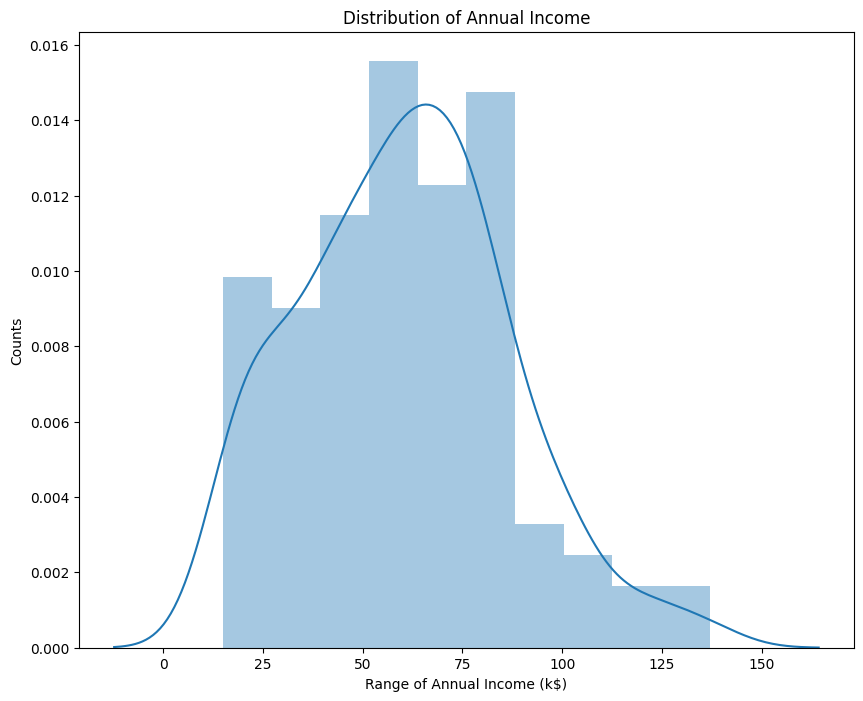

In [ ]:
#Distribution of annual income
plt.figure(figsize=(10,8))
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Counts')
plt.show()

###**Distribution of Spending Score**

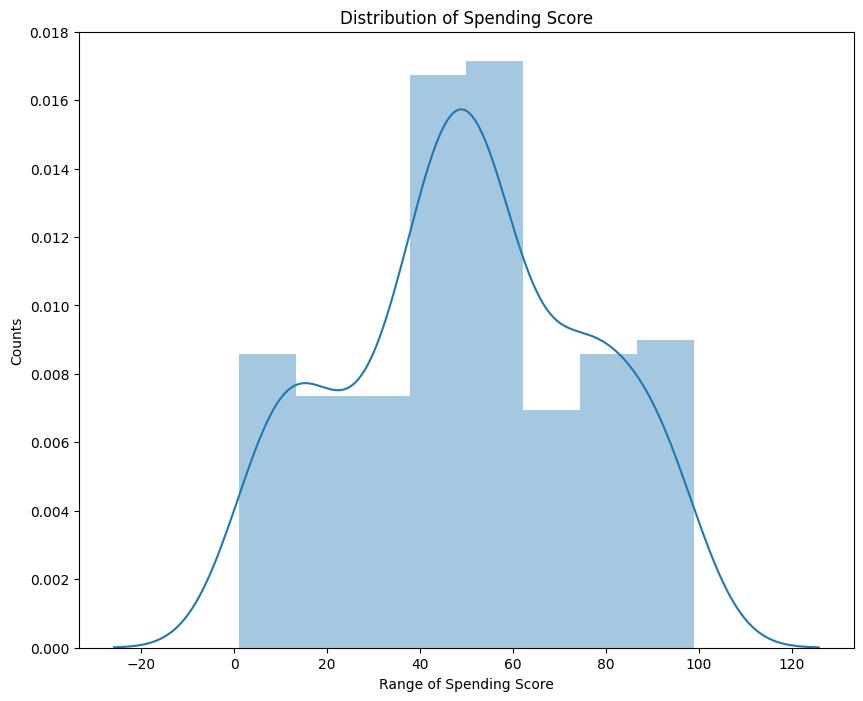

In [ ]:
#Distribution of Spending Score
plt.figure(figsize=(10,8))
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score')
plt.xlabel('Range of Spending Score')
plt.ylabel('Counts')
plt.show()

###**Value counts of gender**

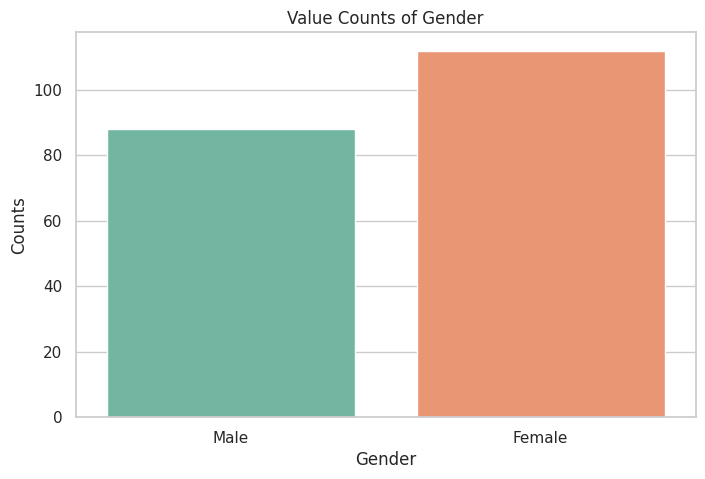

In [ ]:
#Value counts of gender
plt.figure(figsize=(8,5))
sns.set(style='whitegrid')
sns.countplot(x='Genre', data=df, palette='Set2')
plt.title('Value Counts of Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

##**Annual Income vs Spending Score**

In [ ]:
px.scatter(df,
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    color =df['Genre'],
    title="Annual Income vs Spending Score")

**Insight:**
* Customers with similar income show very different spending behavior → segmentation needed.

##**Feature selection:**

In [ ]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

##**Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

##**Finding optimal K using Elbow method**

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
px.line(
    x=range(1,11),
    y=wcss,
    markers=True,
    title="Elbow Method for Optimal Clusters",
    labels={"x":"Number of Clusters", "y":"WCSS"})

**Insights:**
* Elbow at K = 5
* Best balance between accuracy & simplicity

##**Applying KMeans clustering**

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

##**Cluster Visualization:**

In [ ]:
px.scatter(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    color="Cluster",
    title="Customer Segmentation using K-Means",
    hover_data=["Age", "Genre"]
    )

##**K-Means Clustering**

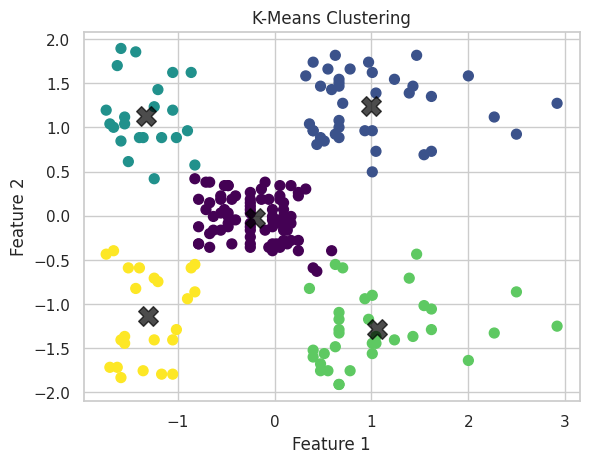

In [ ]:
plt.scatter(
    x_scaled[:, 0],
    x_scaled[:, 1],
    c=df['Cluster'],
    s=50,
    cmap='viridis'
)

# Centroids
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=200,
    alpha=0.7,
    marker='X'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")

plt.show()

##**Analysing cluster**

In [ ]:
df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].mean()

,Annual Income (k$),Spending Score (1-100),Age
Cluster,,,
0,55.296296,49.518519,42.716049
1,86.538462,82.128205,32.692308
2,25.727273,79.363636,25.272727
3,88.200000,17.114286,41.114286
4,26.304348,20.913043,45.217391


In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
0,81
1,39
3,35
4,23
2,22


###**Insights:**
* Cluster 1: Premium customers (high income, high spend)

* Cluster 3: Potential customers (high income, low spend)

* Cluster 2: Young impulsive buyers

* Cluster 0: Regular customers

* Cluster 4: Low engagement customers